# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [4]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

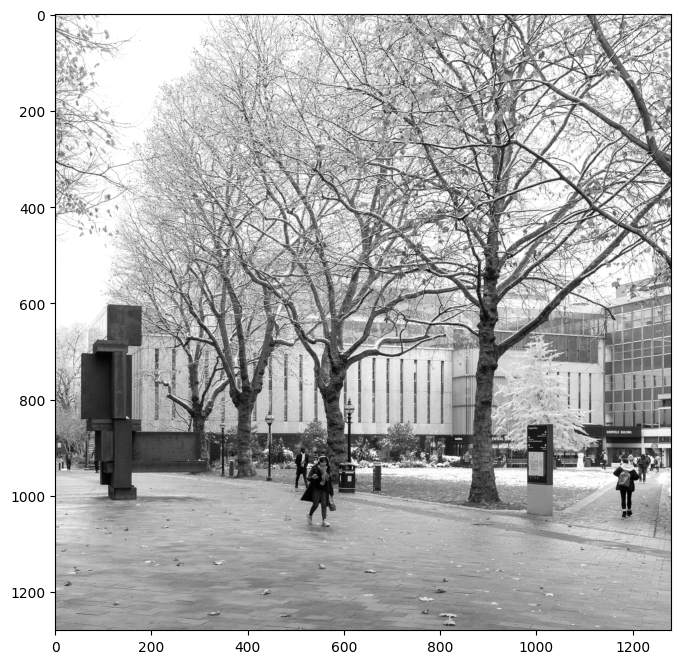

In [5]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(8, 8)

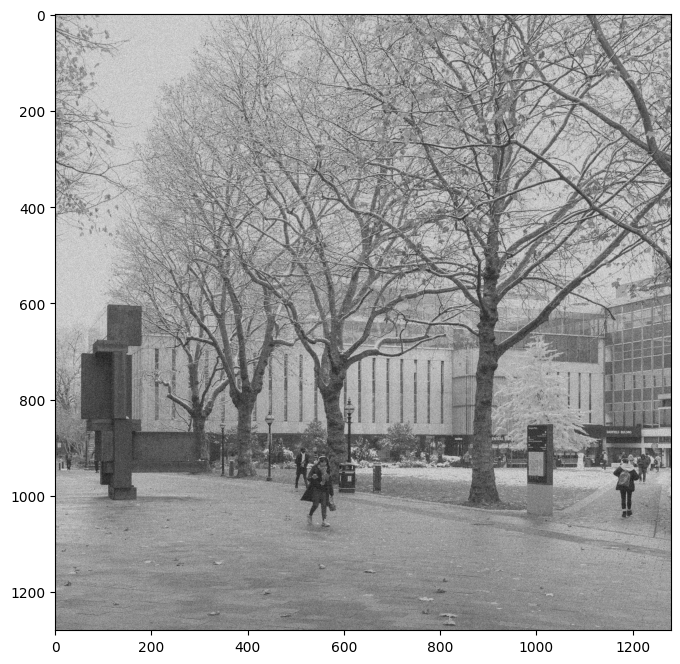

In [8]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


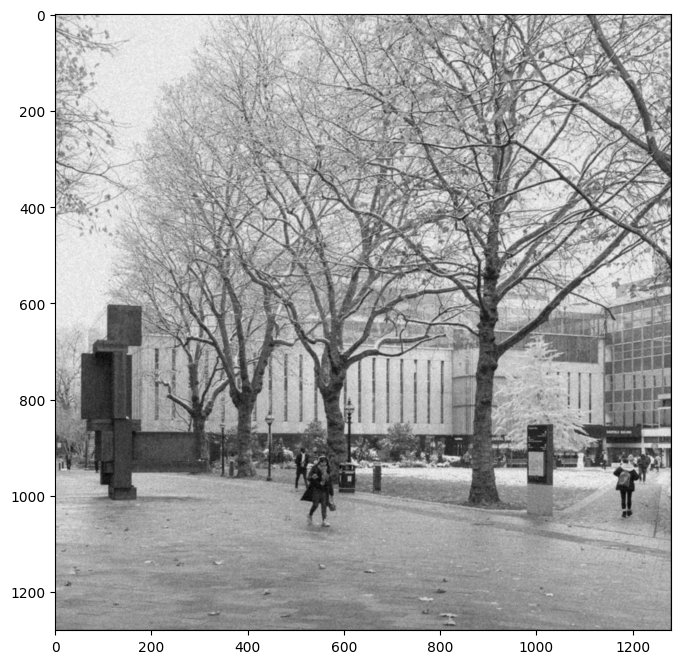

In [13]:
# Design the filter h
### Insert your code ###
kernel_size = 3
h = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same', boundary='fill', fillvalue=0)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

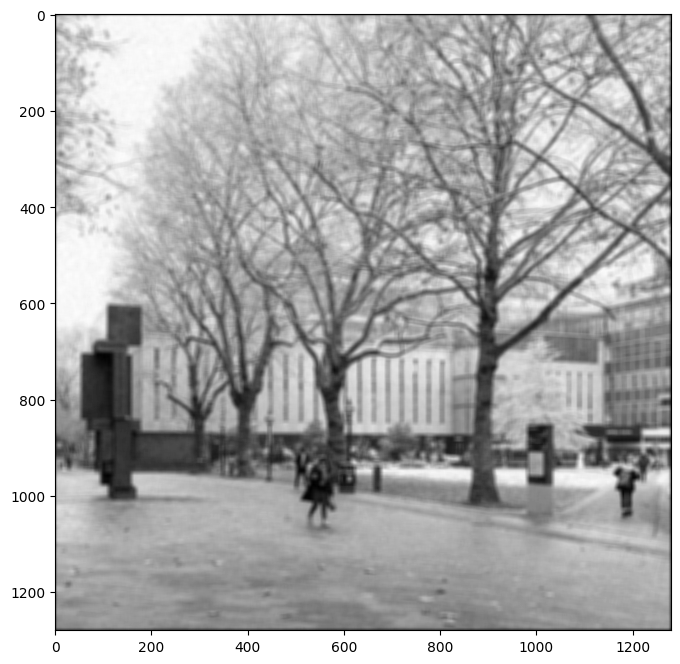

In [14]:
# Design the filter h
### Insert your code ###
kernel_size = 11
h = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same', boundary='fill', fillvalue=0)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

In [7]:
### Insert your answer ###
"""
The kernel size represents the window size of pixels used for calculating the average value of each pixel of the output image. 
Hence modifying the kernel size indicates the smoothness of the image. Increasing the kernel size results in a more smoothed image, since the "window" size grows bigger, meaning that more neighbouring pixels are being considered for computing the average. 
In the example from 1.1 we can notice that some noise has been reduced from its input. However, in the example from 1.2, the significantly increased window size results in a very blurred image, where details can no longer be easily observed. 
"""

## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


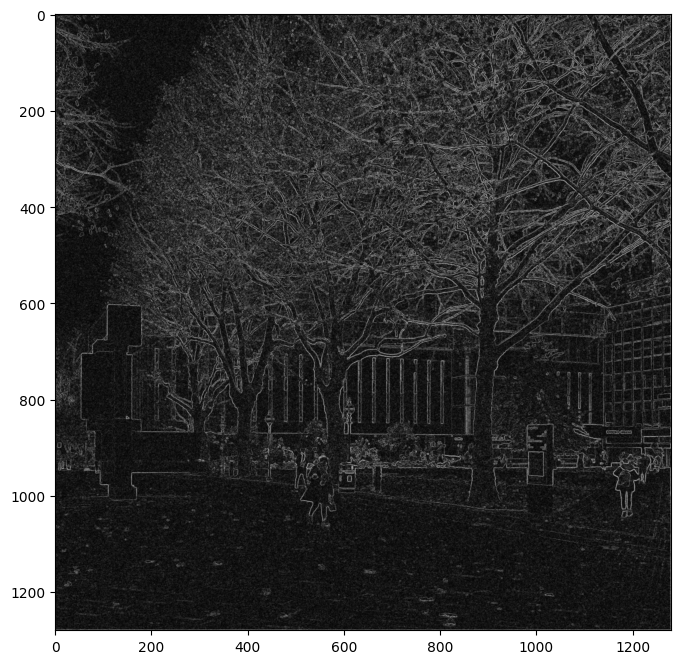

In [16]:
# Design the filters
### Insert your code ###
# Used the sobel matrices from the lecture slides
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.transpose(sobel_x)
# sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Image filtering
image_sobel_x = scipy.signal.convolve2d(image_noisy, sobel_x, mode='same', boundary='fill', fillvalue=0)
image_sobel_y = scipy.signal.convolve2d(image_noisy, sobel_y, mode='same', boundary='fill', fillvalue=0)

# Calculate the gradient magnitude
grad_mag = np.sqrt(np.square(image_sobel_x) + np.square(image_sobel_y))

# Print the filters (provided)
print('sobel_x:')
print(sobel_x)
print('sobel_y:')
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

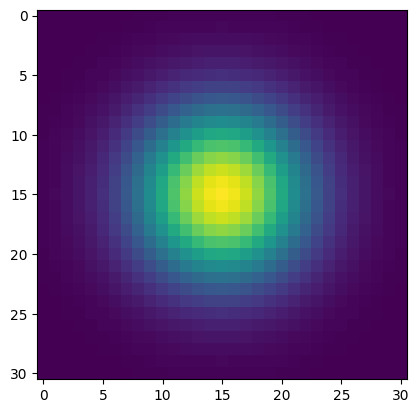

In [18]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    
    ### Insert your code ###
    
    # generating 2 dense grids with values in the range [-3sigma, 3sigma] 
    # per row and per column respectively
    k = 3
    x, y = np.mgrid[-k*sigma:k*sigma+1, -k*sigma:k*sigma+1]
    
    h = 1/np.sqrt((2*np.pi)*sigma) * np.exp(-(x**2 + y**2)/(2*sigma**2))
    h = h / h.sum()
    return h

# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

Gaussian filtering time: 
4.232330083847046


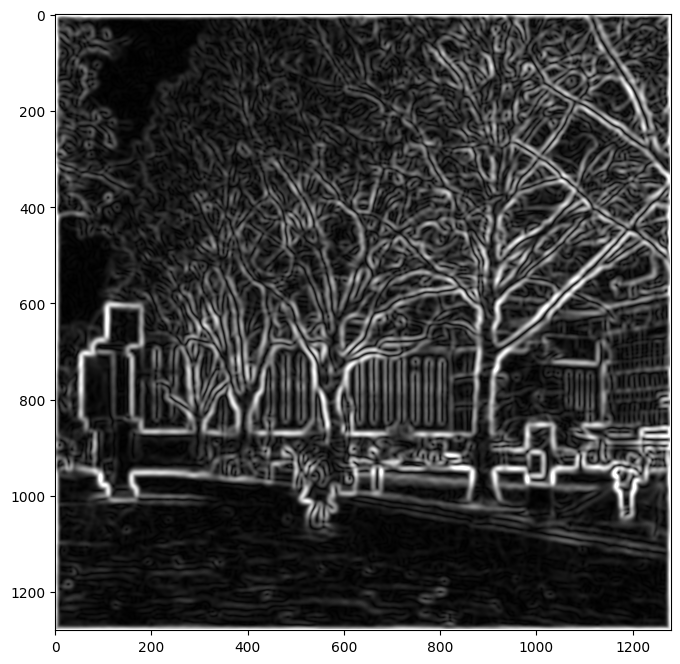

In [31]:
# Construct the Gaussian filter
sigma = 5
h = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing and count time
start = time.time()
image_gaussian = scipy.signal.convolve2d(image_noisy, h, mode='same', boundary='fill', fillvalue=0)
end = time.time()

elapsed = end - start
print("Gaussian filtering time: ")
print(elapsed)

# Image filtering
image_sobel_x = scipy.signal.convolve2d(image_gaussian, sobel_x, mode='same', boundary='fill', fillvalue=0)
image_sobel_y = scipy.signal.convolve2d(image_gaussian, sobel_y, mode='same', boundary='fill', fillvalue=0)

# Calculate the gradient magnitude
grad_mag = np.sqrt(np.square(image_sobel_x) + np.square(image_sobel_y))

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

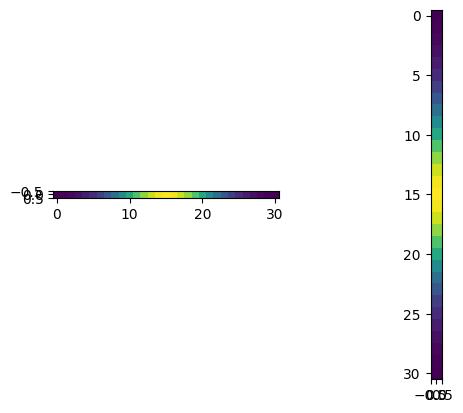

In [35]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    ### Insert your code ###
    k = 3
    grid = np.mgrid[-k*sigma:k*sigma+1]
    h = 1/np.sqrt((2*np.pi)*sigma) * np.exp(-(grid**2)/(2*sigma**2))
    return h / h.sum()

# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter
gaussian_filter = gaussian_filter_1d(sigma)

# The Gaussian filter along x-axis. Its shape is (1, sz).
### Insert your code ###
h_x = np.expand_dims(gaussian_filter, 0) 

# The Gaussian filter along y-axis. Its shape is (sz, 1).
### Insert your code ###
h_y = np.expand_dims(gaussian_filter, 1)

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

Gaussian filtering time with separable filters: 
0.12249207496643066
Mean Absolute Difference between the 2 gradient magnitude maps:
4.2810915244902355e-13


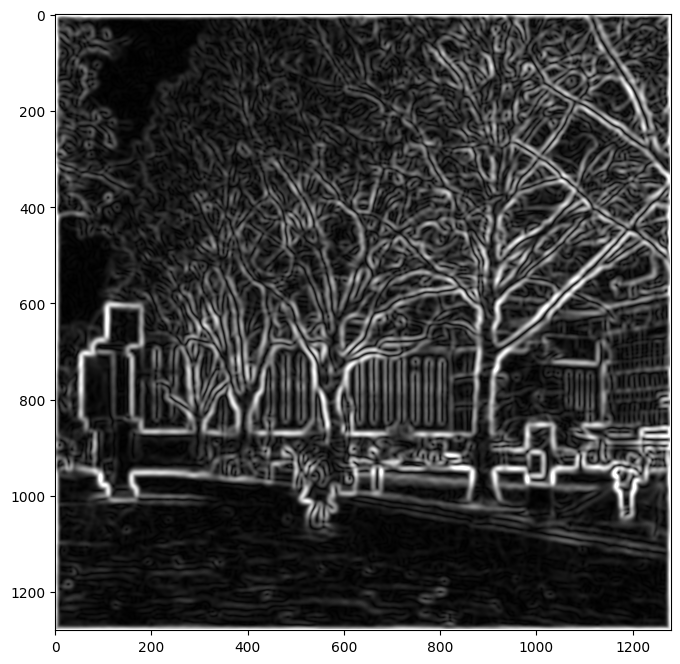

In [54]:
# Perform separable Gaussian smoothing and count time
### Insert your code ###

# Image filtering
### Insert your code ###
start = time.time()
image_gaussian_x = scipy.signal.convolve(image_noisy, h_x, mode='same')
image_gaussian_y = scipy.signal.convolve(image_gaussian_x, h_y, mode='same')
end = time.time()

elapsed = end - start
print("Gaussian filtering time with separable filters: ")
print(elapsed)

# Calculate the gradient magnitude
### Insert your code ###
image_sobel_x = scipy.signal.convolve2d(image_gaussian_y, sobel_x, mode='same', boundary='fill', fillvalue=0)
image_sobel_y = scipy.signal.convolve2d(image_gaussian_y, sobel_y, mode='same', boundary='fill', fillvalue=0)
grad_mag2 = np.sqrt(np.square(image_sobel_x) + np.square(image_sobel_y))

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
### Insert your code ###
grad_mag_array = np.array(grad_mag)
grad_mag2_array = np.array(grad_mag2)
grad_mean_diff = np.mean(np.abs(np.subtract(grad_mag2_array, grad_mag_array)))
print("Mean Absolute Difference between the 2 gradient magnitude maps:")
print(grad_mean_diff)


### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time.

Filtering with Gaussian and Sobel filters involve smoothing the image and emphasizing the edges detected in the image, respectively. Hence applying them both, one after another, returns an image with well dfeined edges and smoothened regions because noise in the gradient magnitude gets surpressed by Gaussian filtering. When applying Gaussian filtering in 2D, then computation time(~3.007) is significantly higher than the computation time observed in separable Gaussian filtering(~0.093). That is because the 2D Gaussian filter is being applied at each pixel of the photo, performing an overall large number of dot products. With separable filtering, we create two 1D filters (one on the x-axis and one on the y-axis) each of which is being applied only once over each row/column, resulting in a much smaller number of dot product operations being performed. 
Another thing to note is that applying 2D filtering is much more precise than separable filtering since each operation is occuring on the pixel level. Hence the picture obtained through 2D Gaussian might be more precise and smoothened compared to the other. Using 2D might be preffered when we care less about computation time and more about image accuracy.


## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [55]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [58]:
# Expand the dimension of the numpy array
### Insert your code ###
image_noisy_expanded = np.expand_dims(np.expand_dims(image_noisy, 0), 0)

# Convert to a Pytorch tensor using torch.from_numpy
image_noisy_torch = torch.from_numpy(np.float32(image_noisy_expanded))


### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

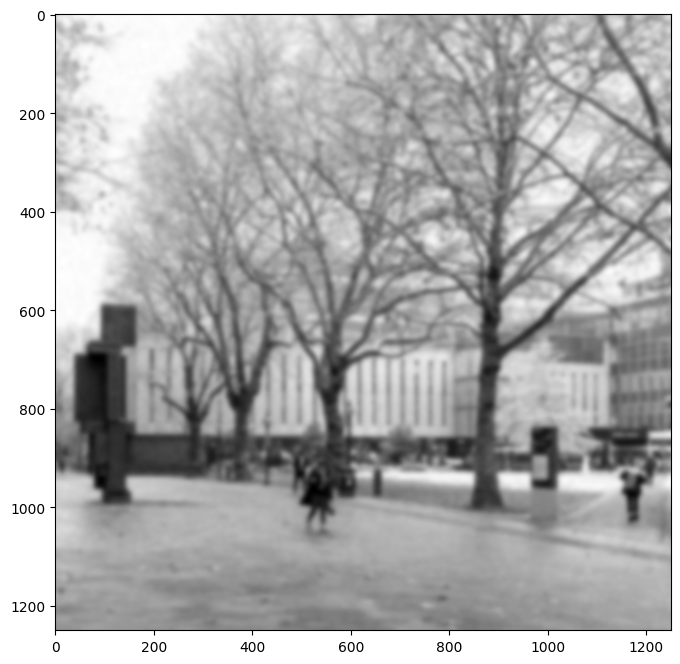

In [59]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)

# Create the Conv2D filter
conv_filter = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=sigma)

# Setting the kernel
kernel = np.array([[h]])
conv_filter.weight.data = torch.from_numpy(np.float32(kernel))

# Filtering
image_filtered = conv_filter(image_noisy_torch).detach().numpy()[0][0]

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

In [63]:
sigma = 5
h = gaussian_filter_2d(sigma)
# Create Conv2D filters
### Insert your code ###
conv_filter = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=sigma)

# Perform filtering
kernel = np.array([[h]])
conv_filter.weight.data = torch.from_numpy(np.float32(kernel))
image_filtered = conv_filter(image_noisy_torch)

# Calculate the gradient magnitude map
### Insert your code ###
sobel_x = torch.tensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=torch.float32)
sobel_y = torch.tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=torch.float32)

conv_x = torch.nn.Conv2d(1, 1, 3, padding=1, bias=False)
conv_x.weight.data = sobel_x.repeat(1, 1, 1, 1)

conv_y = torch.nn.Conv2d(1, 1, 3, padding=1, bias=False)
conv_y.weight.data = sobel_y.repeat(1, 1, 1, 1)

grad_mag3 = torch.sqrt(conv_x(image_filtered)**2 + conv_y(image_filtered)**2).detach().numpy()[0][0]

# Visualise the gradient magnitude map (provided)
plt.imshow(grad_mag3, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)